In [1]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import lsst.sims.maf.db as db
from lsst.sims.utils import _healbin
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles

import numpy as np
import healpy as hp

import microlensingMetric

In [4]:
#Please enter your SciServer username between the single quotes below!
your_username = 'nsabrams'

In [5]:
#Read in an opSim (in this case "baseline_v1.5_10yrs.db")
opsdb1 = db.OpsimDatabase('/home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db')

Create an output folder, 'outDir', that will track the results in another database ('resultsDb_sqlite.db').  

In [6]:
if your_username == '':
    raise Exception('Please provide your username!  See the top of this notebook.')
    
outDir = '/home/idies/workspace/Storage/{}/persistent/LSST_Hackathon/tmp'.format(your_username)
resultsDb = db.ResultsDb(outDir=outDir)

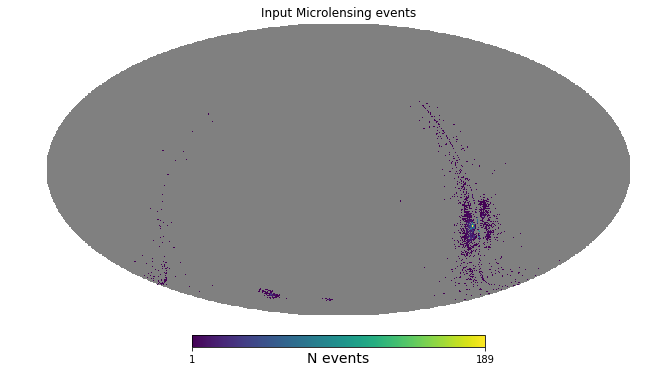

In [7]:
# generate a slicer with 10000 microlensing events
slicer = microlensingMetric.generateMicrolensingSlicer(min_crossing_time=1, max_crossing_time=10, n_events=10000)
# We can reach into the slicer and plot up the distribution of things
dist = _healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], slicer.slicePoints['dec']*0+1, reduceFunc=np.sum)
hp.mollview(dist, title='Input Microlensing events', unit='N events')

## Put time in days before peak you would like the trigger criteria to be met

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'night', 'fieldDec', 'fieldRA', 'filter', 'fiveSigmaDepth'].
Found 2224095 visits
Running:  ['microlensing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.


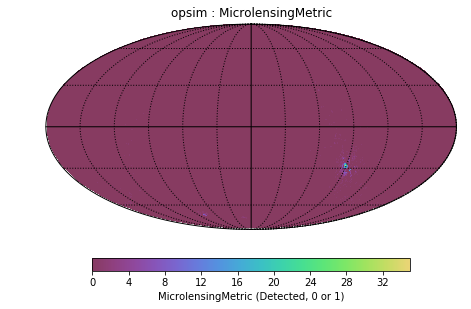

In [12]:
metric = microlensingMetric.MicrolensingMetric(time_before_peak = 10)

sql = ''
# Don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 64}
plotFuncs = [plots.HealpixSkyMap()]
summaryMetrics=[metrics.MeanMetric(maskVal=0)]
bundle = metricBundles.MetricBundle(metric, slicer, sql,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
bundleDict = {'microlensing': bundle}

bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb1, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

## Put detect = True if you would like both side of the light curve to be considered and increase the ptsNeeded on either side of the lightcurve

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'night', 'fieldDec', 'fieldRA', 'filter', 'fiveSigmaDepth'].
Found 2224095 visits
Running:  ['microlensing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.


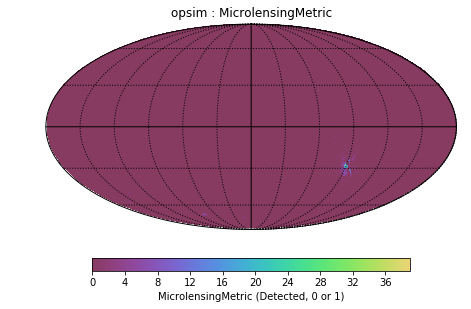

In [15]:
metric = microlensingMetric.MicrolensingMetric(detect = True, ptsNeeded = 4)

sql = ''
# Don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 64}
plotFuncs = [plots.HealpixSkyMap()]
summaryMetrics=[metrics.MeanMetric(maskVal=0)]
bundle = metricBundles.MetricBundle(metric, slicer, sql,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
bundleDict = {'microlensing': bundle}

bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb1, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

## It does not make sense to ask for a trigger before the peak if you want both sides of the lightcurve to be considered, so an error will be raised

In [17]:
metric = microlensingMetric.MicrolensingMetric(detect = True, time_before_peak = 10)

sql = ''
# Don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 64}
plotFuncs = [plots.HealpixSkyMap()]
summaryMetrics=[metrics.MeanMetric(maskVal=0)]
bundle = metricBundles.MetricBundle(metric, slicer, sql,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
bundleDict = {'microlensing': bundle}

bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb1, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'night', 'fieldDec', 'fieldRA', 'filter', 'fiveSigmaDepth'].
Found 2224095 visits
Running:  ['microlensing']


Exception: When detect = True, time_before_peak must be zero